In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
train_data=pd.read_csv("/content/SalaryData_Train.csv")
test_data=pd.read_csv("/content/SalaryData_Test.csv")

In [ ]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()

In [ ]:
# string columns in the data
String=[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']

In [ ]:
for i in String:
    train_data[i]=encoder.fit_transform(train_data[i])
    test_data[i]=encoder.fit_transform(test_data[i])

In [ ]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [ ]:
x_train=train_data.iloc[:,0:13]
y_train=train_data.iloc[:,13]

In [ ]:
x_test=test_data.iloc[:,0:13]
y_test=test_data.iloc[:,13]

In [ ]:
#Gaussian Classification
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       <=50K       0.95      0.81      0.87     13250
        >50K       0.33      0.67      0.44      1810

    accuracy                           0.79     15060
   macro avg       0.64      0.74      0.66     15060
weighted avg       0.87      0.79      0.82     15060



In [ ]:
# it can be infered that salary for more than 50 thousands are greater than less than 50 thousand salary employee

In [ ]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_M = MultinomialNB()

In [ ]:
model_M.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
ypred_M = model_M.predict(x_test)

In [ ]:
print(classification_report(ypred_M,y_test))

              precision    recall  f1-score   support

       <=50K       0.96      0.79      0.87     13811
        >50K       0.21      0.62      0.32      1249

    accuracy                           0.77     15060
   macro avg       0.58      0.71      0.59     15060
weighted avg       0.90      0.77      0.82     15060



In [ ]:
# it can be infered that salary for more than 50 thousands are greater than less than 50 thousand salary employee

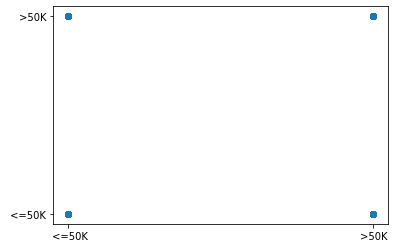

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ypred_M,y_pred)

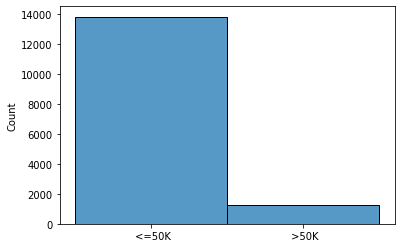

In [ ]:
import seaborn as sns
sns.histplot(data=ypred_M, )